In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft2, ifft2, ifftshift, fftshift

from classicalfield_orig import FiniteTempGPE as gpe

No vortices to be spawned
Total Imag Time:  1.3922040462493896
kmax:  4.0212385965949355
T:  4.042589962686201


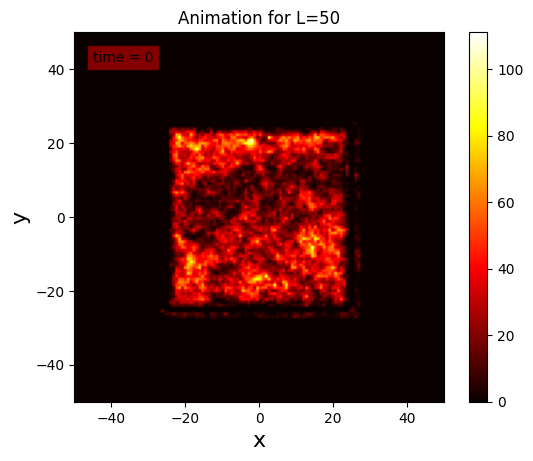

In [2]:
# test out to see if the new potential is good 
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 2250000, dtcoef = 0.0005, boxthickness = 1, Nsamples = 1, runAnim = True, animFileName = 'testparams_higherwell.mp4', Tfact = 1/2, dst = False)

In [4]:
print(np.max(g.gpeobj.Vbox)) 
print(g.gpeobj.kmax**2/2) 

10.182320661695666
8.085179925372403


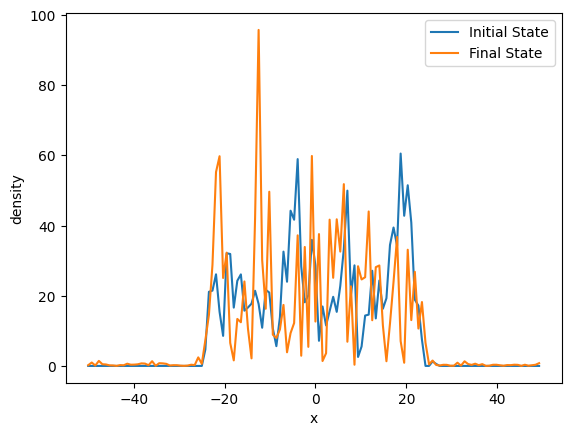

In [24]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2, label = 'Initial State')
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('density')
plt.legend() 

In [17]:
print(np.shape(g.snaps)) 
print(2*686/9)

(9001, 128, 128)
152.44444444444446


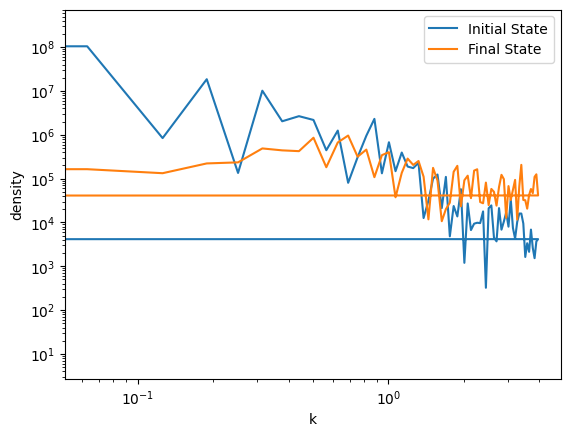

In [23]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2, label = 'Initial State')
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2, label = 'Final State')
plt.xlabel('k')
plt.ylabel('density')
plt.yscale('log')
plt.xscale('log')
plt.legend() 

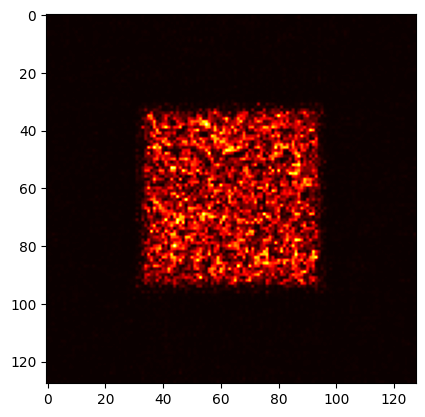

In [12]:
plt.figure() 
plt.imshow(np.abs(g.snaps[-1])**2, cmap = plt.cm.hot)

Testing a finer grid for a longer time interval

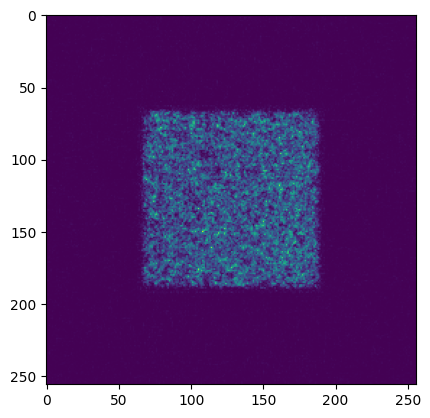

In [2]:
imported_data = np.loadtxt('finergridoutput.csv', dtype = np.complex_)
plt.imshow(np.abs(imported_data)**2)

No vortices to be spawned
Total Imag Time:  7.546933889389038
kmax:  8.042477193189871
T:  16.170359850744806


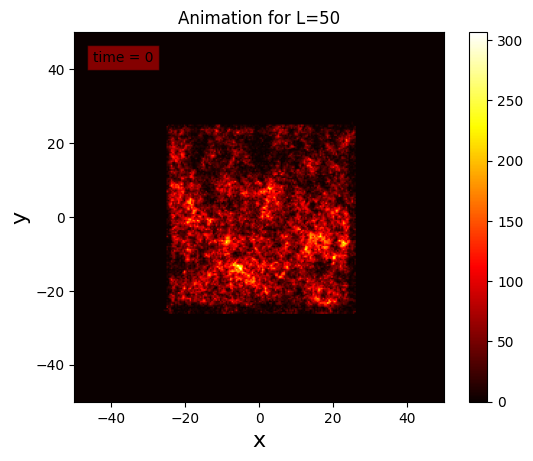

In [3]:
# test out to see if the new potential is good 
g_2 = gpe(npoints = 2**7, numImagSteps = 2000, numRealSteps = 10000000, dtcoef = 0.0005, boxthickness = 1, Nsamples = 1, runAnim = True, animFileName = 'testparams_higherenergy_longer.mp4', Tfact = 1/2, dst = False, imp = True, impPsi = imported_data)